In [1]:
from skimage import io
import numpy as np
import numpy.matlib

image = io.imread('Koala.jpg')
io.imshow(image)
io.show()

<Figure size 640x480 with 1 Axes>

In [2]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [3]:
K = 15 
max_iters = 50

In [4]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [5]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [6]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [7]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [8]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(15, 3)
(786432,)


In [9]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(786432, 3)
(768, 1024, 3)


In [10]:
import scipy.misc
scipy.misc.imsave('Koala_small.jpg', X_recovered)

/Users/karankatiyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


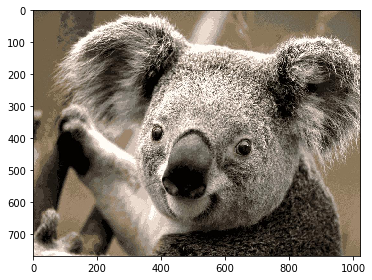

In [11]:
image_compressed = io.imread('Koala_small.jpg')
io.imshow(image_compressed)
io.show()

In [12]:
import os
info = os.stat('Koala.jpg')
print("size of Original image: ",info.st_size/1024,"KB")
info = os.stat('Koala_small.jpg')
print("size of compressed image: ",info.st_size/1024,"KB")

size of Original image:  762.5302734375 KB
size of compressed image:  158.3955078125 KB


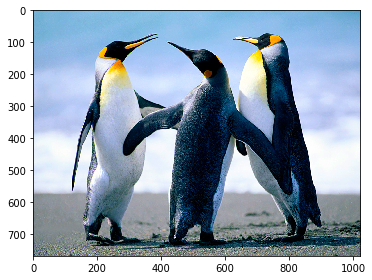

In [13]:
image = io.imread('Penguins.jpg')
io.imshow(image)
io.show()

In [14]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [15]:
K = 20 
max_iters = 50

In [16]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(20, 3)
(786432,)


In [17]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(786432, 3)
(768, 1024, 3)


In [18]:
scipy.misc.imsave('Penguin_small.jpg', X_recovered)

/Users/karankatiyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


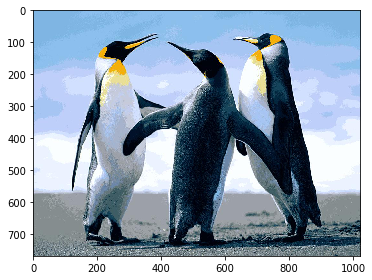

In [19]:
image_compressed = io.imread('Penguin_small.jpg')
io.imshow(image_compressed)
io.show()

In [20]:
import os
info = os.stat('Penguins.jpg')
print("size of Original image: ",info.st_size/1024,"KB")
info = os.stat('Penguin_small.jpg')
print("size of compressed image: ",info.st_size/1024,"KB")

size of Original image:  759.6044921875 KB
size of compressed image:  115.99609375 KB
